In [1]:
# 출처 : https://cprosenjit.medium.com/10-time-series-forecasting-methods-we-should-know-291037d2e285

## 1. Library and Data load

In [59]:
""" 시간대별 데이터 불러오기 """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyupbit
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pyupbit.get_ohlcv("KRW-BTC", interval = "day", count=60)

In [60]:
data

open        high         low       close  \
2021-12-12 09:00:00  61414000.0  62887000.0  60904000.0  62049000.0   
2021-12-13 09:00:00  61995000.0  62190000.0  58158000.0  58626000.0   
2021-12-14 09:00:00  58626000.0  60150000.0  57347000.0  59930000.0   
2021-12-15 09:00:00  59909000.0  62150000.0  58055000.0  61198000.0   
2021-12-16 09:00:00  61196000.0  61660000.0  59500000.0  59817000.0   
2021-12-17 09:00:00  59820000.0  60198000.0  57400000.0  58086000.0   
2021-12-18 09:00:00  58110000.0  58867000.0  57207000.0  58402000.0   
2021-12-19 09:00:00  58438000.0  59864000.0  58071000.0  58329000.0   
2021-12-20 09:00:00  58329000.0  58616000.0  56917000.0  58011000.0   
2021-12-21 09:00:00  57980000.0  60650000.0  57500000.0  60023000.0   
2021-12-22 09:00:00  60023000.0  60772000.0  59605000.0  59753000.0   
2021-12-23 09:00:00  59759000.0  61925000.0  59120000.0  61490000.0   
2021-12-24 09:00:00  61490000.0  62850000.0  61250000.0  61939000.0   
2021-12-25 09:00:00  61939000.0  62500000.0  61107000.0  61177000.0   
2021-12-26 09:00:00  61177000.0  61939000.0  60288000.0  61467000.0   
2021-12-27 09:00:00  61467000.0  62500000.0  60934000.0  61508000.0   
2021-12-28 09:00:00  61470000.0  61508000.0  57912000.0  58274000.0   
2021-12-29 09:00:00  58261000.0  58763000.0  56650000.0  57089000.0   
2021-12-30 09:00:00  57089000.0  58233000.0  56400000.0  57200000.0   
2021-12-31 09:00:00  57233000.0  58812000.0  56233000.0  56784000.0   
2022-01-01 09:00:00  56784000.0  58271000.0  56762000.0  57915000.0   
2022-01-02 09:00:00  57915000.0  58300000.0  57100000.0  57531000.0   
2022-01-03 09:00:00  57540000.0  57749000.0  56133000.0  56641000.0   
2022-01-04 09:00:00  56640000.0  57685000.0  56000000.0  56023000.0   
2022-01-05 09:00:00  56023000.0  57100000.0  52701000.0  53854000.0   
2022-01-06 09:00:00  53854000.0  54300000.0  52388000.0  53239000.0   
2022-01-07 09:00:00  53240000.0  53358000.0  50900000.0  51449000.0   
2022-01-08 09:00:00  51449000.0  52709000.0  50829000.0  52142000.0   
2022-01-09 09:00:00  52142000.0  52600000.0  51144000.0  51678000.0   
2022-01-10 09:00:00  51672000.0  51999000.0  48897000.0  51246000.0   
2022-01-11 09:00:00  51255000.0  52493000.0  50408000.0  52307000.0   
2022-01-12 09:00:00  52306000.0  53945000.0  51800000.0  53349000.0   
2022-01-13 09:00:00  53349000.0  53940000.0  51809000.0  51885000.0   
2022-01-14 09:00:00  51885000.0  52691000.0  51010000.0  52230000.0   
2022-01-15 09:00:00  52230000.0  52891000.0  51878000.0  52357000.0   
2022-01-16 09:00:00  52357000.0  52634000.0  51948000.0  52165000.0   
2022-01-17 09:00:00  52165000.0  52300000.0  50822000.0  51436000.0   
2022-01-18 09:00:00  51435000.0  51600000.0  50192000.0  51179000.0   
2022-01-19 09:00:00  51183000.0  51395000.0  49988000.0  50333000.0   
2022-01-20 09:00:00  50333000.0  52361000.0  49575000.0  49648000.0   
2022-01-21 09:00:00  49600000.0  50001000.0  44600000.0  45316000.0   
2022-01-22 09:00:00  45316000.0  45622000.0  42629000.0  43375000.0   
2022-01-23 09:00:00  43376000.0  44500000.0  42725000.0  44253000.0   
2022-01-24 09:00:00  44255000.0  45600000.0  40871000.0  44731000.0   
2022-01-25 09:00:00  44764000.0  45572000.0  43511000.0  44909000.0   
2022-01-26 09:00:00  44905000.0  47460000.0  44520000.0  45100000.0   
2022-01-27 09:00:00  45100000.0  45844000.0  43786000.0  45809000.0   
2022-01-28 09:00:00  45800000.0  46890000.0  45060000.0  46588000.0   
2022-01-29 09:00:00  46592000.0  47746000.0  46180000.0  47146000.0   
2022-01-30 09:00:00  47144000.0  47500000.0  46498000.0  47208000.0   
2022-01-31 09:00:00  47208000.0  47647000.0  45624000.0  47266000.0   
2022-02-01 09:00:00  47304000.0  48270000.0  46869000.0  47760000.0   
2022-02-02 09:00:00  47784000.0  47900000.0  45401000.0  45517000.0   
2022-02-03 09:00:00  45518000.0  45900000.0  44770000.0  45835000.0   
2022-02-04 09:00:00  45835000.0  50843000.0  45500000.0  50633000.0   
2022-02-05 09:00:00  50613000.0  51488000.0  502160

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2021-12-12 09:00:00 to 2022-02-09 09:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    60 non-null     float64
 1   high    60 non-null     float64
 2   low     60 non-null     float64
 3   close   60 non-null     float64
 4   volume  60 non-null     float64
 5   value   60 non-null     float64
dtypes: float64(6)
memory usage: 3.3 KB


In [62]:
import warnings
warnings.filterwarnings('ignore')

## 2. Train Test Split

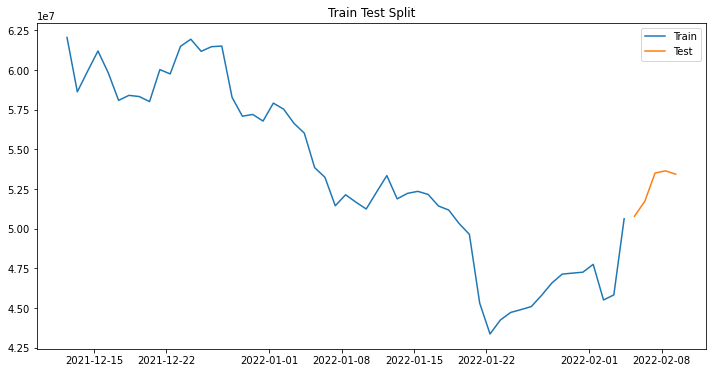

In [63]:
dataset = data[['close']]
train_size=0.92
total_data = dataset.shape[0]
split = int((total_data * train_size))
train = dataset[0:split] 
test = dataset[split:]
plt.figure(figsize=(12,6))
plt.plot(train.index, train.close, label='Train')
plt.plot(test.index, test.close, label='Test')
#plt.xticks(dataset.index, dataset.index, rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()

## 3. Data Preprocessing

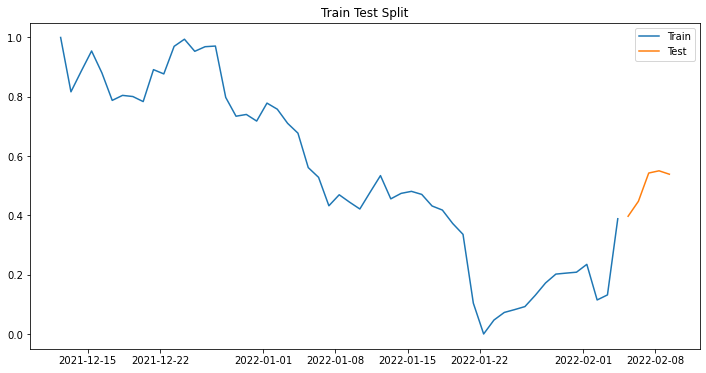

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(train)
train = pd.DataFrame(mm.transform(train), columns=train.columns, index=list(train.index.values))
test = pd.DataFrame(mm.transform(test), columns=test.columns, index=list(test.index.values))
plt.figure(figsize=(12,6))
plt.plot(train.index, train.close, label='Train')
plt.plot(test.index, test.close, label='Test')
#plt.xticks(dataset.index, dataset.index, rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()

## 4. Modeling

In [65]:
def plot_figure(title, pred, train_index=train.index, test_index=test.index, y_train=train.close, y_test=test.close):
    rmse = sqrt(mean_squared_error(y_test, pred))
    print(f"{title} Mean Square Error (RMSE): %.3f" % rmse)
    plt.figure(figsize=(10,6))
    plt.plot(train_index, y_train, label='Train')
    plt.plot(test_index, y_test, label='Test')
    plt.plot(test_index, pred, label='Prediction')
    #plt.xticks(dataset["Month"], dataset["Month"], rotation='vertical')
    plt.legend(loc='best')
    plt.title(f"Predictions by {title}, RMSE : %.3f " %rmse)
    plt.show()

### ① Naive Approach

In [66]:
predictions_nv = test.copy()
# Copy the last observed Sales from training data
predictions_nv["Predictions"] = train.tail(1).iloc[0]["close"]
print (predictions_nv)

                        close  Predictions
2022-02-05 09:00:00  0.396969     0.388669
2022-02-06 09:00:00  0.447521     0.388669
2022-02-07 09:00:00  0.542787     0.388669
2022-02-08 09:00:00  0.550284     0.388669
2022-02-09 09:00:00  0.538770     0.388669


Naive Mean Square Error (RMSE): 0.123


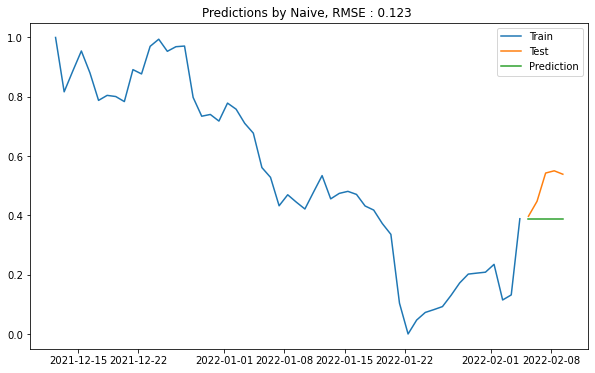

In [67]:
plot_figure(title = "Naive", pred=predictions_nv["Predictions"])

### ② AR (Auto Regressive)

In [68]:
from statsmodels.tsa.ar_model import AutoReg
model_ag = AutoReg(endog = train["close"], \
                   lags = 7, \
                   trend='c', \
                   seasonal = False, \
                   exog = None, \
                   hold_back = None, \
                   period = None, \
                   missing = 'none')
# endog: dependent variable, response variable or y (endogenous)
# exog: independent variable, explanatory variable or x (exogenous)
# lags: the no. of lags to include in the model
#       [1, 4] will only include lags 1 and 4 
#       while lags=4 will include lags 1, 2, 3, and 4
# trend: trend to include in the model
#        {‘n’, ‘c’, ‘t’, ‘ct’}
#        ‘n’ - No trend.
#        ‘c’ - Constant only.
#        ‘t’ - Time trend only.
#        ‘ct’ - Constant and time trend.
# seasonal: whether to include seasonal dummies in the model
fit_ag = model_ag.fit()
print("Coefficients:\n%s" % fit_ag.params)

Coefficients:
intercept    0.012255
close.L1     1.198519
close.L2    -0.373919
close.L3     0.342944
close.L4    -0.348521
close.L5     0.083912
close.L6     0.019845
close.L7     0.037190
dtype: float64


In [69]:
predictions = fit_ag.predict(start=len(train), \
                             end=len(train)+len(test)-1, \
                             dynamic=False)
predictions = pd.DataFrame(predictions, columns=['Predictions'])
predictions.index = test.index
result  = pd.concat([test, predictions], axis=1)#.reindex(test.index)
print (result)

                        close  Predictions
2022-02-05 09:00:00  0.396969     0.415390
2022-02-06 09:00:00  0.447521     0.401450
2022-02-07 09:00:00  0.542787     0.447492
2022-02-08 09:00:00  0.550284     0.427533
2022-02-09 09:00:00  0.538770     0.389732


AR Mean Square Error (RMSE): 0.099


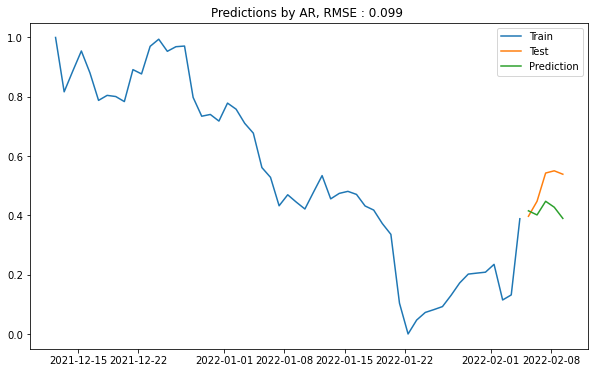

In [70]:
plot_figure(title = "AR", pred=predictions['Predictions'])

### ③ MA(Moving Average)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
model_ma = ARIMA(endog = train["close"], \
                   order=(0, 0, 2)) 
# q = 2 
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_ma = model_ma.fit()
print("Coefficients:\n%s" % fit_ma.params)

Coefficients:
const     0.555103
ma.L1     1.484815
ma.L2     0.821303
sigma2    0.013827
dtype: float64


In [72]:
predictions_ma = fit_ma.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)

MA Mean Square Error (RMSE): 0.122


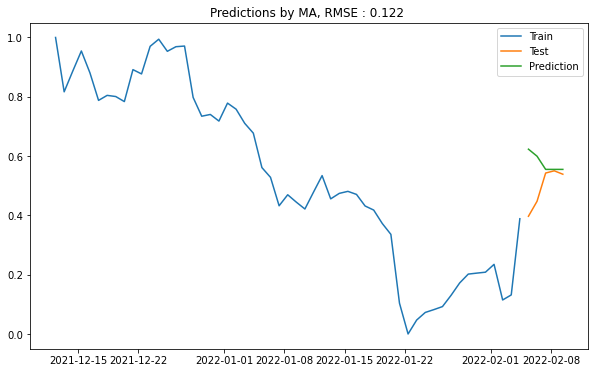

In [73]:
plot_figure(title = "MA", pred=predictions_ma)

### ④ ARMA(Auto Regressive Moving Average)

In [74]:
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(endog = train["close"], \
                   order = (2, 0, 1))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_arma = model_arma.fit()
print("Coefficients:\n%s" % fit_arma.params)

Coefficients:
const     0.545970
ar.L1     0.170420
ar.L2     0.757241
ma.L1     0.855902
sigma2    0.005592
dtype: float64


In [75]:
predictions_arma = fit_arma.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)

ARMA Mean Square Error (RMSE): 0.100


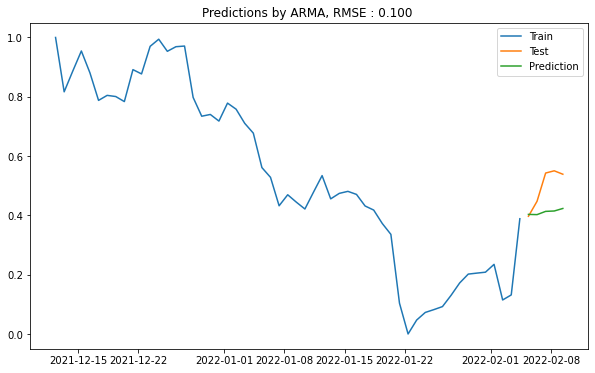

In [76]:
plot_figure(title = "ARMA", pred=predictions_arma)

### ⑤ ARIMA(Auto Regressive Integrated Moving Average)

In [77]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(endog = train["close"], \
                   order = (1, 1, 1))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_arima = model_arima.fit()
print("Coefficients:\n%s" % fit_arima.params)

Coefficients:
ar.L1    -0.378863
ma.L1     0.638885
sigma2    0.005580
dtype: float64


In [78]:
predictions_arima = fit_arima.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)

ARIMA Mean Square Error (RMSE): 0.095


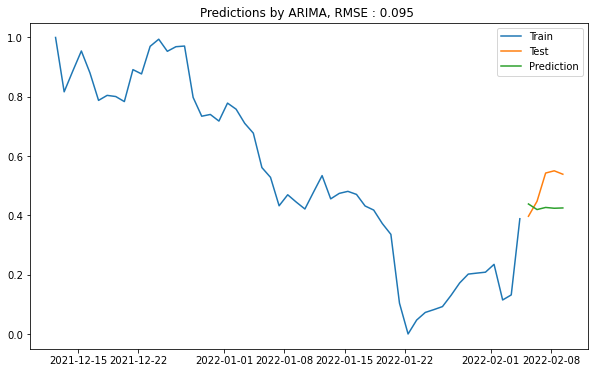

In [79]:
plot_figure(title = "ARIMA", pred=predictions_arima)

### ⑥ SARIMA(Seasonal AutoRegressive Integrated Moving Average)

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(endog = train["close"], \
                        order = (1, 1, 1), \
                        seasonal_order=(0, 0, 0, 0))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
# seasonal_order: (P,D,Q,s) order of the seasonal component of 
#     the model for the AR parameters, differences, 
#     MA parameters, and periodicity. s is the periodicity 
#     (number of periods in season), often it is 4 for 
#     quarterly data or 12 for monthly data (default, no 
#     seasonal effect).
fit_sarima = model_sarima.fit()
print("Coefficients:\n%s" % fit_sarima.params)

Coefficients:
ar.L1    -0.378863
ma.L1     0.638885
sigma2    0.005580
dtype: float64


In [81]:
predictions_sarima = fit_sarima.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)

SARIMA Mean Square Error (RMSE): 0.095


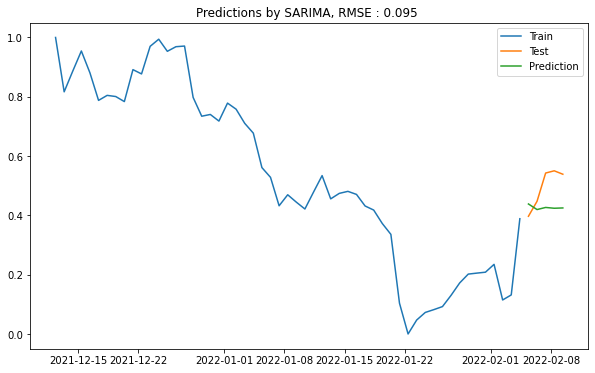

In [82]:
plot_figure(title = "SARIMA", pred=predictions_sarima)

### ⑦Auto ARIMA

In [83]:
from pmdarima.arima import auto_arima
model_aarima = auto_arima (y = train["close"], \
                           seasonal=False, \
                           stepwise=True)
# seasonal : default=True, whether to fit 
#            a seasonal ARIMA.
# stepwise : default=True, the auto_arima 
#            function has two modes: stepwise 
#            & parallelized (slower)

In [84]:
model_aarima

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [85]:
predictions_aarima = model_aarima.predict(n_periods=test.shape[0], \
                                        X=None, \
                                        return_conf_int=False, \
                                        alpha=0.05)

Auto ARIMA Mean Square Error (RMSE): 0.123


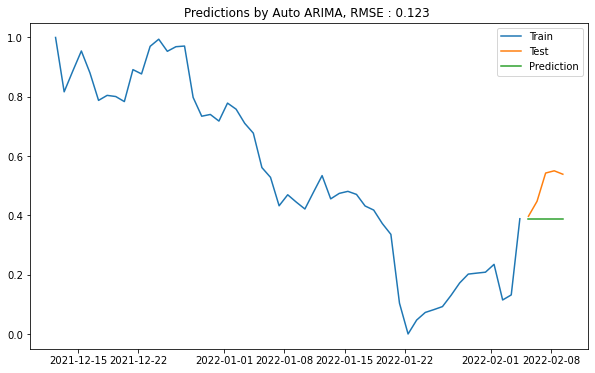

In [86]:
plot_figure(title = "Auto ARIMA", pred=predictions_aarima)

### ⑧ XGBOOST

In [87]:
dataXGB = dataset.copy()
# Restructure the data
dataXGB["Target"] = dataXGB.close.shift(-1)
# Drop the last null column because of shifting
dataXGB.dropna(inplace=True)
# Extract features & labels
X = dataXGB.loc[:,"close"].values
y = dataXGB.loc[:, "Target"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
      train_test_split(X, y, train_size = train_size, \
                       random_state = 0, shuffle=False)
import xgboost
reg = xgboost.XGBRegressor(objective='reg:squarederror', \
                           n_estimators=100)
reg.fit(X_train, y_train)

IndexError: tuple index out of range

In [ ]:
predictions_xgb = reg.predict(X_test)
predictions_xgb = pd.DataFrame({'Predictions': \
                                     predictions_xgb})
result_xgb = pd.concat( \
                       [dataXGB.tail(len(X_test)) \
                               .reset_index(drop=True), \
                        predictions_xgb], axis=1)
print (result_xgb)

### ⑩ TBATS 

In [92]:
from tbats import TBATS
# /databricks/python/bin/pip install tbats==1.1.0
model_tbats = TBATS(seasonal_periods=(12, 28),\
              use_arma_errors=False,\
              use_box_cox=False,\
              n_jobs=None,\
              use_trend=None,\
              use_damped_trend=None)\
          .fit(train.close)

In [93]:
predictions_tbats = model_tbats.forecast(steps=test.shape[0])
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
result_tbats = pd.concat([test.reset_index(drop=True), \
                           predictions_tbatsDF], axis=1)
print (result_tbats)

      close  Predictions
0  0.396969     0.407674
1  0.447521     0.415445
2  0.542787     0.475825
3  0.550284     0.493251
4  0.538770     0.532289


TBATS Mean Square Error (RMSE): 0.042


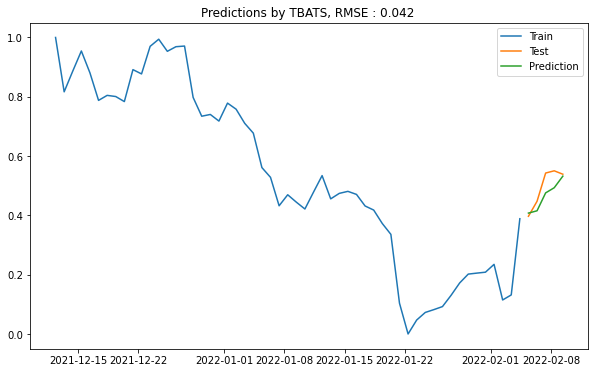

In [94]:
plot_figure(title = "TBATS", pred=predictions_tbatsDF["Predictions"])

### ⑪ ETS

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_es = ExponentialSmoothing(endog=train["close"], \
                                trend='add', \
                                seasonal='add', \
                                seasonal_periods=12, \
                                damped=True)
# Parameters
# endog : The time series to model.
# trend : Type of trend component (optional); 
#         options: "add", "mul", "additive", 
#                  "multiplicative", None
# seasonal : Type of seasonal component (optional); 
#         options: "add", "mul", "additive", 
#                  "multiplicative", None
# damped_trend : Should the trend component 
#                be damped (optional)

In [90]:
fit_es = model_es.fit(optimized=True, \
                      use_boxcox=False, \
                      remove_bias=False)
predictions_es = fit_es.predict(start=test.index[0], \
                                end=test.index[-1])
predictions_es

2022-02-05 09:00:00    0.476895
2022-02-06 09:00:00    0.529940
2022-02-07 09:00:00    0.606288
2022-02-08 09:00:00    0.639723
2022-02-09 09:00:00    0.692659
Freq: D, dtype: float64

ETS Mean Square Error (RMSE): 0.099


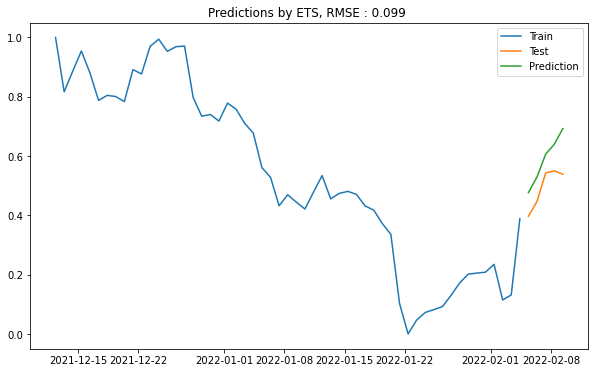

In [91]:
plot_figure(title = "ETS", pred=predictions_es)

In [96]:
# TBATS 추가로 더 해보기

In [121]:
steps = 5
history = mm.transform(dataset)
model_tbats = TBATS(seasonal_periods=(12, 28),\
              use_arma_errors=False,\
              use_box_cox=False,\
              n_jobs=None,\
              use_trend=None,\
              use_damped_trend=None)\
          .fit(history)
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

0    0.542856
1    0.485745
2    0.498366
3    0.505518
4    0.377700
Name: Predictions, dtype: float64

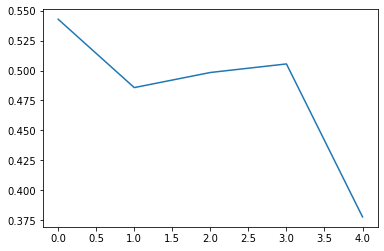

In [122]:
predictions_tbatsDF["Predictions"].plot()

In [116]:
delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]
new_index

[Timestamp('2022-02-10 09:00:00'),
 Timestamp('2022-02-11 09:00:00'),
 Timestamp('2022-02-12 09:00:00'),
 Timestamp('2022-02-13 09:00:00'),
 Timestamp('2022-02-14 09:00:00')]

TBATS 5days Mean Square Error (RMSE): 0.485


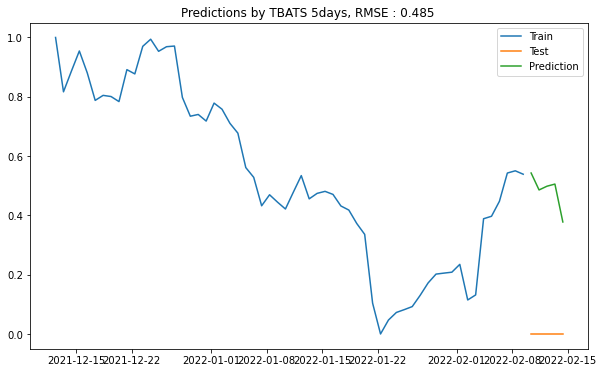

In [129]:
plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))

TBATS 15days Mean Square Error (RMSE): 0.424


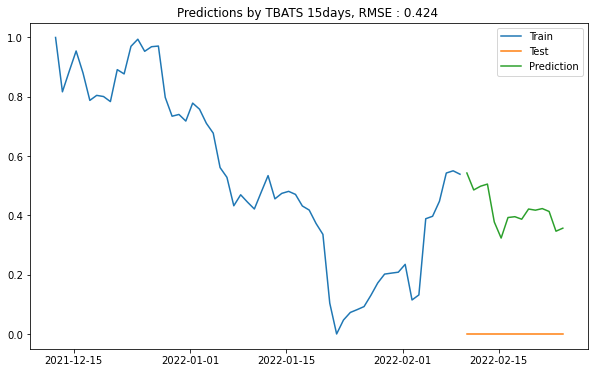

In [131]:
steps = 15
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]

plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))

TBATS 30days Mean Square Error (RMSE): 0.414


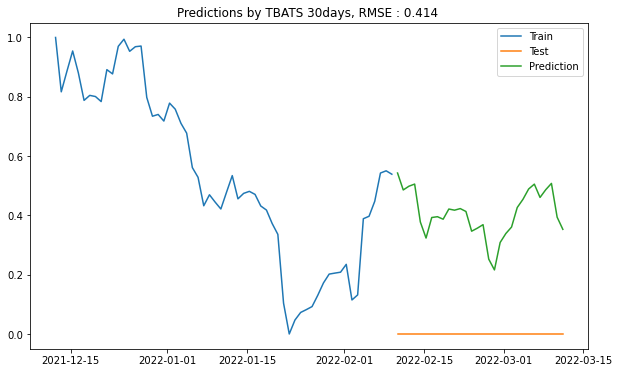

In [132]:
steps = 30
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]

plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))

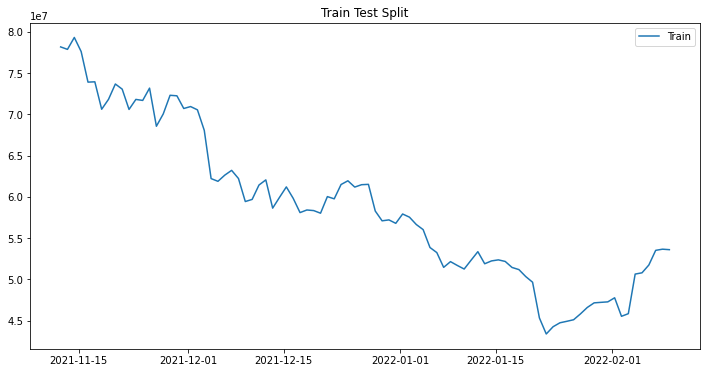

In [142]:
data = pyupbit.get_ohlcv("KRW-BTC", interval = "day", count=90)
dataset = data[['close']].copy()
mm = MinMaxScaler()
mm.fit(train)
dataset = pd.DataFrame(mm.transform(dataset), columns=dataset.columns, index=list(dataset.index.values))
plt.figure(figsize=(12,6))
plt.plot(dataset.index, dataset.close, label='Train')
#plt.xticks(dataset.index, dataset.index, rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()

In [143]:
# 학습
history = dataset.copy()
model_tbats = TBATS(seasonal_periods=(12, 28),\
              use_arma_errors=False,\
              use_box_cox=False,\
              n_jobs=None,\
              use_trend=None,\
              use_damped_trend=None)\
          .fit(history)

TBATS 5days Mean Square Error (RMSE): 53825826.265


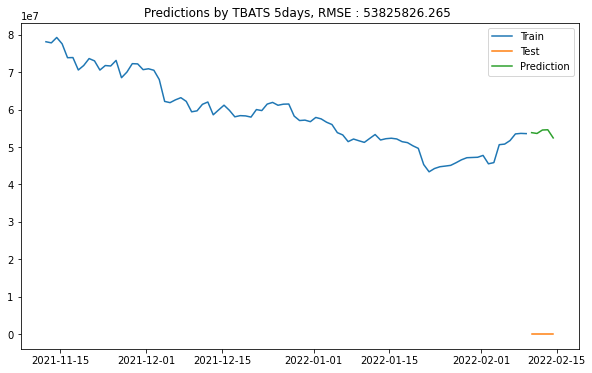

In [144]:
steps = 5
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]

plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))

TBATS 15days Mean Square Error (RMSE): 54006551.040


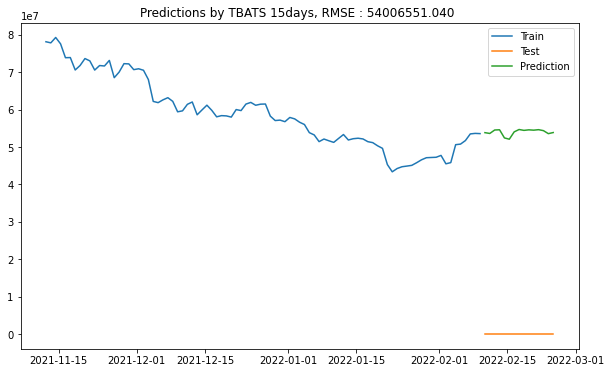

In [145]:
steps = 15
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]

plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))

TBATS 30days Mean Square Error (RMSE): 52570532.538


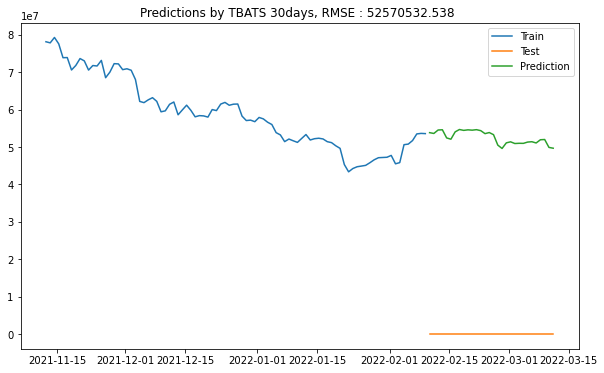

In [146]:
steps = 30
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]

plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))

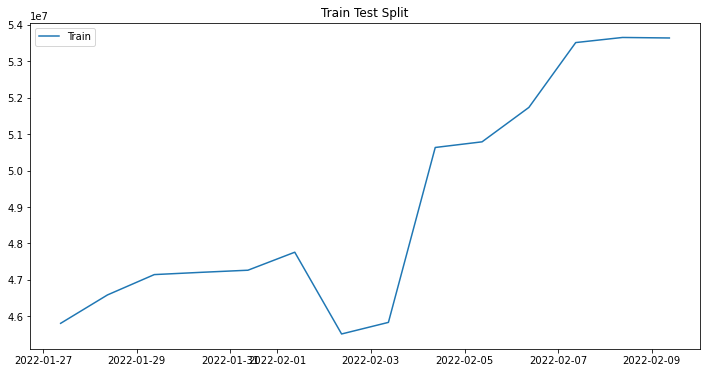

In [147]:
data = pyupbit.get_ohlcv("KRW-BTC", interval = "day", count=14)
dataset = data[['close']].copy()
mm = MinMaxScaler()
mm.fit(train)
dataset = pd.DataFrame(mm.transform(dataset), columns=dataset.columns, index=list(dataset.index.values))
plt.figure(figsize=(12,6))
plt.plot(dataset.index, dataset.close, label='Train')
#plt.xticks(dataset.index, dataset.index, rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()

In [148]:
# 학습
history = dataset.copy()
model_tbats = TBATS(seasonal_periods=(12, 28),\
              use_arma_errors=False,\
              use_box_cox=False,\
              n_jobs=None,\
              use_trend=None,\
              use_damped_trend=None)\
          .fit(history)

TBATS 5days Mean Square Error (RMSE): 30258740.032


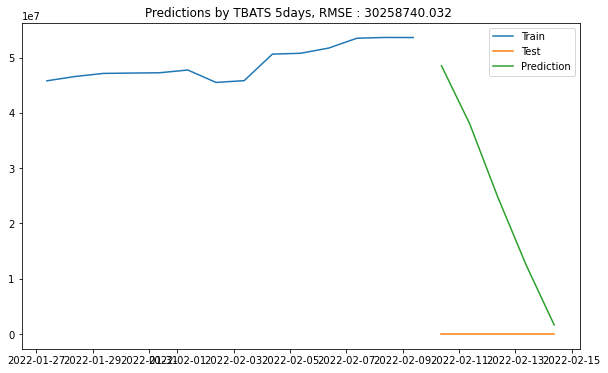

In [149]:
steps = 5
predictions_tbats = model_tbats.forecast(steps=steps)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
predictions_tbatsDF["Predictions"]

delta = dataset.index[-1]-dataset.index[-2]
new_index = [ dataset.index[-1]+ delta*(i+1) for i in np.arange(steps)]

plot_figure(title = f"TBATS {steps}days", pred=predictions_tbatsDF["Predictions"], train_index = dataset.index, test_index=new_index, y_train=history, y_test=np.zeros(steps))